# Data Science - Project 01
## Project Name : Titanic classification
### By P.M.P. Tharindra Jayarathne

## About Dataset
In the annals of maritime history, the fateful night of April 15, 1912, forever etched the sinking of the RMS Titanic into memory. Despite its reputation as an "unsinkable" marvel, the Titanic tragically met its demise after striking an iceberg during its maiden voyage. The disaster claimed the lives of 1502 souls among the 2224 passengers and crew aboard, primarily due to a shortage of lifeboats.

Amidst the chaos and tragedy, chance played a role in survival, yet certain groups seemed to defy the odds.

Our quest now delves into the depths of this historical tragedy with a predictive challenge: "What determined survival on that ill-fated night?" Using a trove of passenger data encompassing names, ages, genders, socio-economic classes, and more, we aim to unravel the factors that influenced who lived and who perished.

The objectives are clear:

1.	Navigate through the dataset, tidying up where necessary, to reveal its hidden insights.
2.	Forge a formidable classification model that forecasts passenger survival.
3.	Refine the model's inner workings, tuning its parameters to perfection, and juxtapose the predictive prowess of various cutting-edge algorithms.
Join us on this journey to unlock the secrets of the Titanic's past, leveraging the power of data and technology to illuminate the stories of those aboard that fateful night.
### Link to the link to the data set 
https://www.kaggle.com/competitions/titanic/data

# 01. Importing libraries/modules

In [3]:
#Importing libraries/modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading data from csv file to pandas dataframe
titanic_data = pd.read_csv('Contacts/train.csv')

In [5]:
#Printing the first 5 rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Printing the first 5 last of the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Number of rows and columns in the dataset
titanic_data.shape

(891, 12)

**This shows it has 891 rows and 12 columns**

In [9]:
# Checking for columns of the dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Information about columns
1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: 1 = 1st - Upper, 2 = 2nd - Middle, 3 = 3rd - Lower 
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

# 02. Data Preprocessing and Data Cleaning

In [12]:
# Getting some information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Checking for duplicated values
titanic_data.duplicated().sum()

0

**This shows in this dataset there are no duplicated data.**

## 2.1. Null Value Treatment 

In [24]:
# Checking the number of nine values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

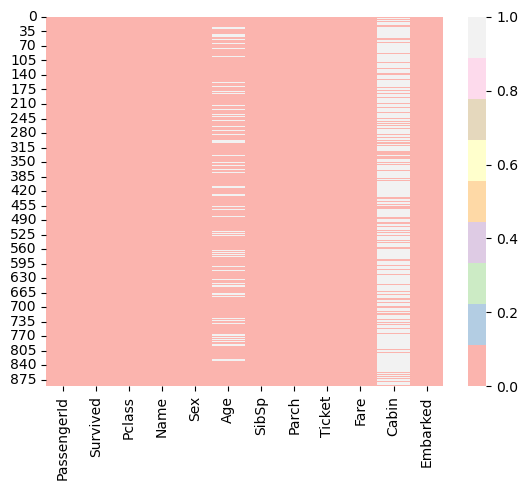

In [26]:
# Visualizing of null values on a heatmap
sns.heatmap(titanic_data.isna(), cmap="Pastel1")

**The heatmap and data reveal that there are missing values in the "Age", "Embarked", and "Cabin" columns.**

In [28]:
# Drop the "Cabin" column from dataset
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

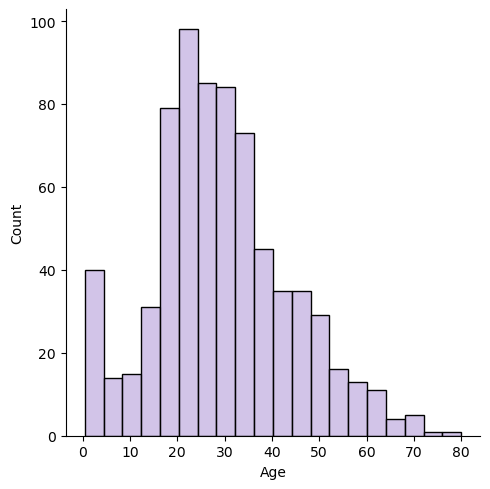

In [31]:
# Distribution of "Age" column
sns.displot(x='Age', data=titanic_data, color='#C3B1E1')
plt.show()

In [33]:
# Replacing the null values in the “Age” column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

**Based on the plot, it is evident that the majority of passengers fall within the 20-40 age range. To handle the missing values in the "Age" column, we will impute them with the mean age.**

In [36]:
# Finding the mode value of the "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [38]:
print(titanic_data['Embarked'].mode()[0])

S


In [40]:
# Replacing the null values in the “Embarked” column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

**In the "Embarked" column, there are only two missing values. To address this, we will find the mode of the column, which is 'S = 0'. We will then fill the missing values with this mode.**

In [43]:
# Rechecking the number of nine values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

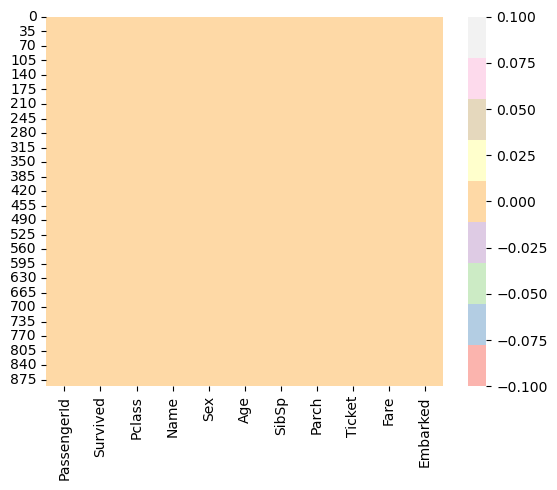

In [45]:
# Visualizing of null values after null value treatment on a heatmap
sns.heatmap(titanic_data.isna(), cmap="Pastel1")

**This data indicates that there are no missing values (Null values) present.**

## 2.2. Dropping Unnecessary Columns
**Let's lighten our data load by removing some unnecessary baggage. The 'PassengerId', 'Name', and 'Ticket' columns don't contribute to our modeling efforts, so we'll drop them to keep our dataset streamlined and efficient.**

**With these columns gone, our dataset is now leaner and more focused, ready for effective data modeling.**

In [49]:
# lightening the data load
titanic_data.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [51]:
#showing information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# 03. Data Analysis

In [54]:
# Getting some statistical measures about the dataset
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
# Showing information about categorical columns
titanic_data.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


# 04. Data Visualization

In [59]:
sns.set()

### 1. Sex Column

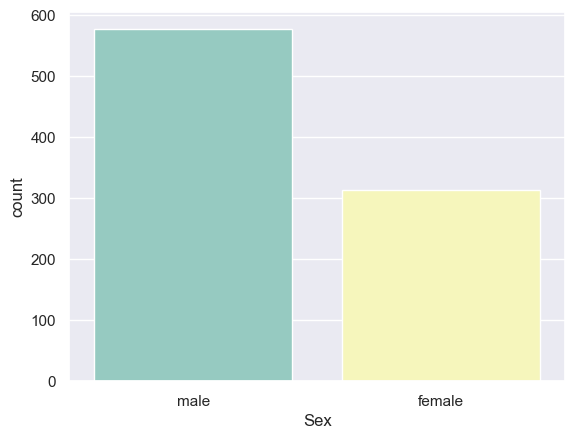

In [62]:
# plotting Countplot for "Sex" Column
sns.countplot(x='Sex', data=titanic_data, palette = "Set3")
plt.show()

### 2. Survived Column

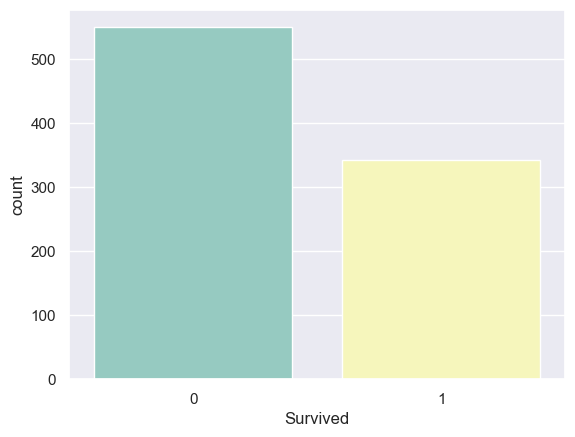

In [65]:
# plotting Countplot for "Survived" Column
sns.countplot(x='Survived', data=titanic_data, palette = "Set3")
plt.show()

### 3. Pclass Column

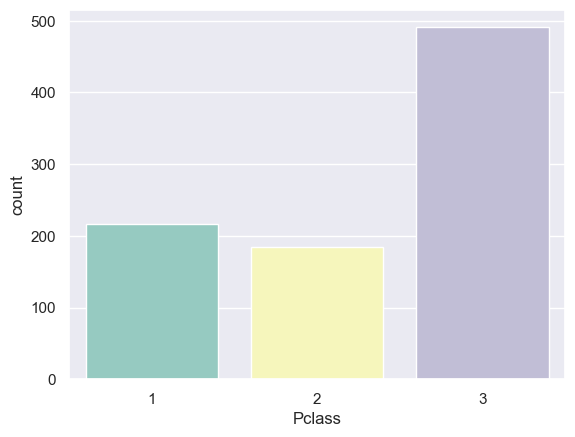

In [68]:
# plotting Countplot for "Pclass" Column
sns.countplot(x='Pclass', data=titanic_data, palette = "Set3")
plt.show()

### 4. SibSp Column

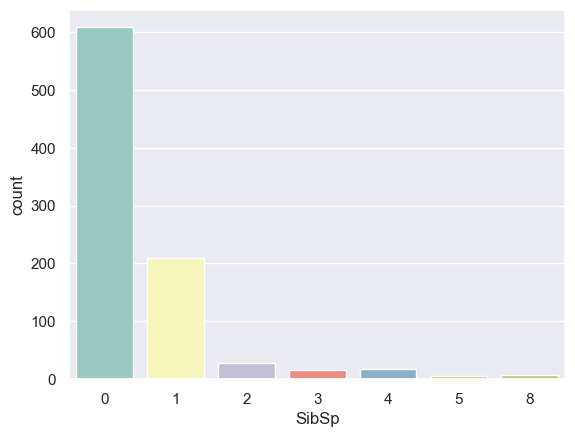

In [71]:
# plotting Countplot for "SibSp" Column
sns.countplot(x='SibSp', data=titanic_data, palette = "Set3")
plt.show()

### 5. Parch Column

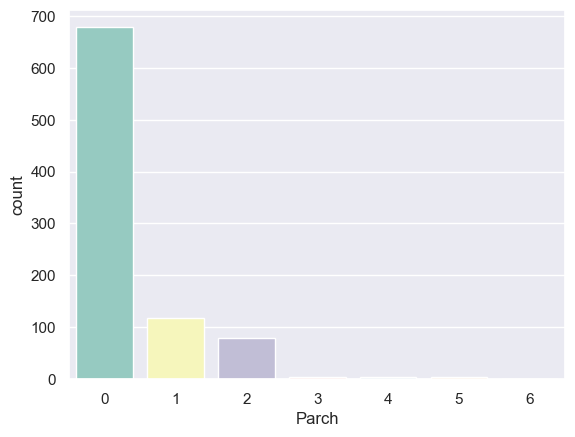

In [73]:
# plotting Countplot for "Parch" Column
sns.countplot(x='Parch', data=titanic_data, palette = "Set3")
plt.show()

### 6. Embarked Column

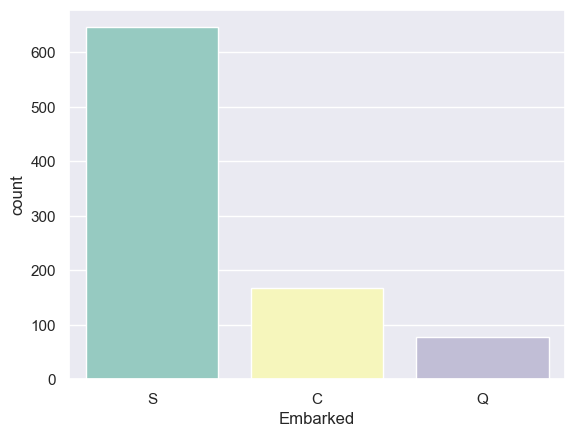

In [75]:
# plotting Countplot for "Embarked" Column
sns.countplot(x='Embarked', data=titanic_data, palette = "Set3")
plt.show()

### 7. Distribution of the Age Column

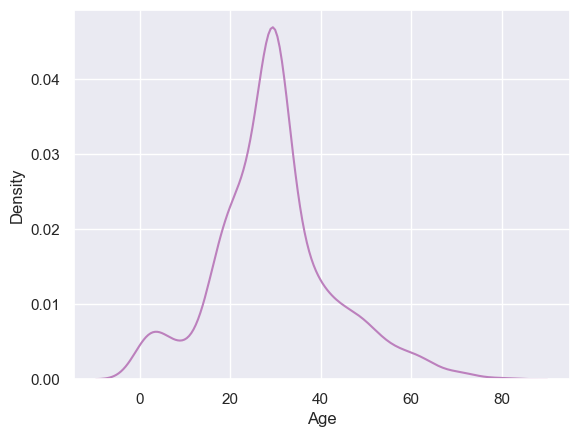

In [77]:
# Age Distribution
sns.kdeplot(x=titanic_data['Age'], color='#bc80bd')
plt.show()

## 4.1. Visualizing the distribution of various columns based on gender (Sex Column)

### 1. Distribution of "Survived" column

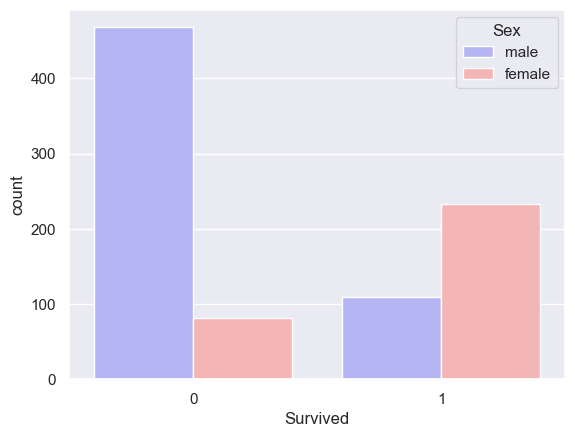

In [80]:
# Distribution of "Survived" column based on Sex Column
sns.countplot(x=titanic_data['Survived'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

### 2. Distribution of "Pclass" column

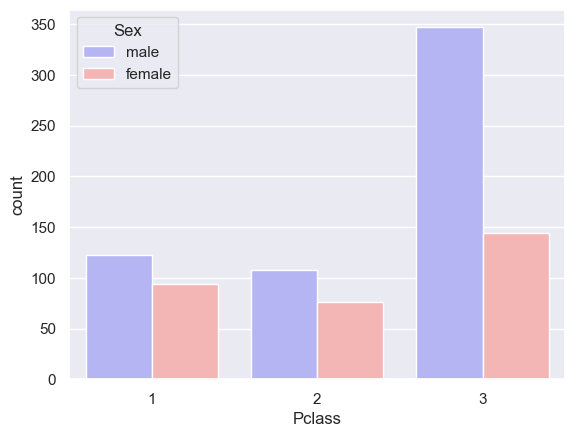

In [82]:
# Distribution of "Pclass" column based on Sex Column
sns.countplot(x=titanic_data['Pclass'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

### 3. Distribution of "SibSp" column

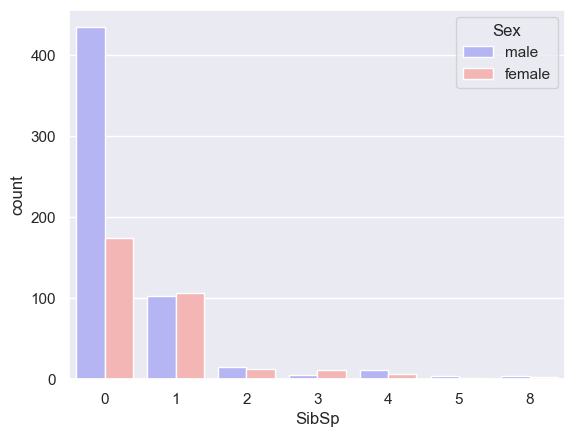

In [84]:
# Distribution of "SibSp" column based on Sex Column
sns.countplot(x=titanic_data['SibSp'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

### 4. Distribution of "Parch" column

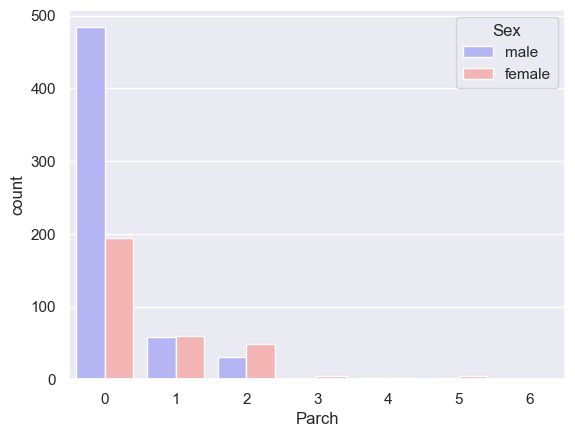

In [86]:
# Distribution of "Parch" column based on Sex Column
sns.countplot(x=titanic_data['Parch'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

### 5. Distribution of "Embarked" column

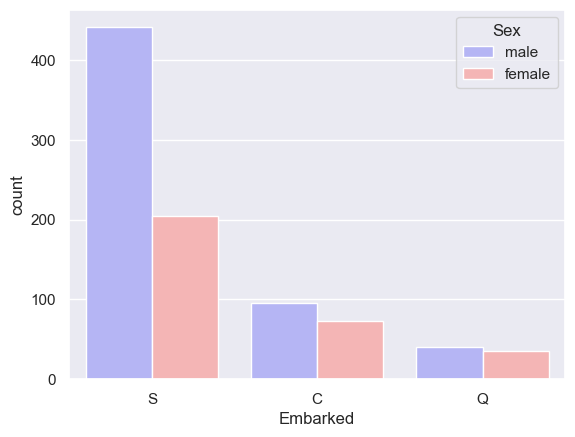

In [90]:
# Distribution of "Embarked" column based on Sex Column
sns.countplot(x=titanic_data['Embarked'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

### 7. Distribution of the Age Column 

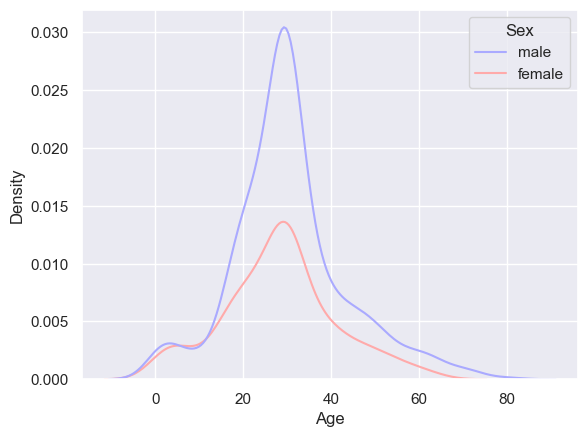

In [95]:
# Distribution of "Age" columns based on Sex Column
sns.kdeplot(x=titanic_data['Age'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

## 4.2. Histogram

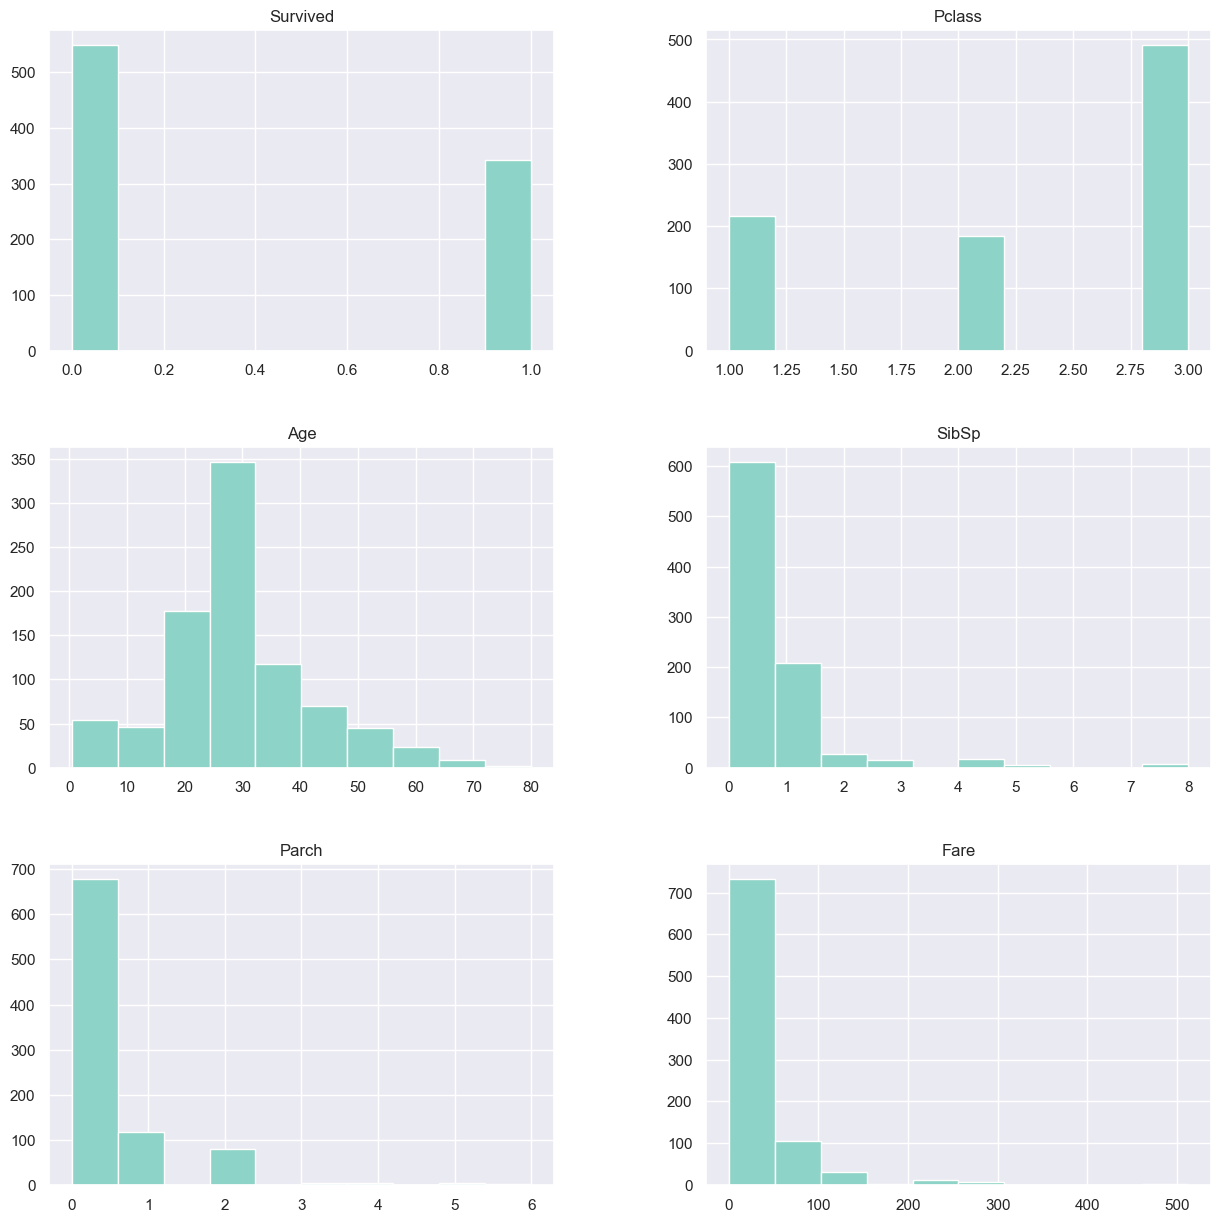

In [101]:
# Plotting Histplot for Dataset
titanic_data.hist(figsize=(15,15),color='#8dd3c7')
plt.show()

## 4.3. Boxplot

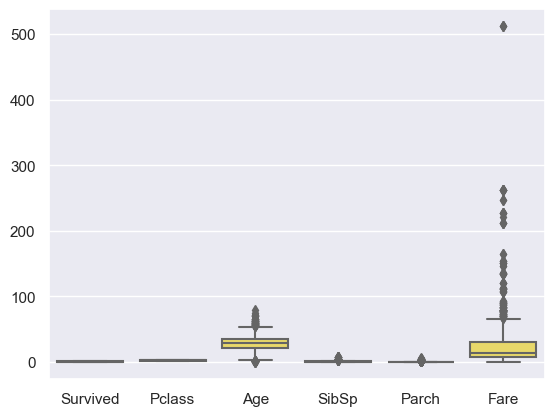

In [104]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic_data, color='#fde855')
plt.show()

**This plot reveals outliers in the "Age" and "Fare" columns.**

## 4.4. Pairplot

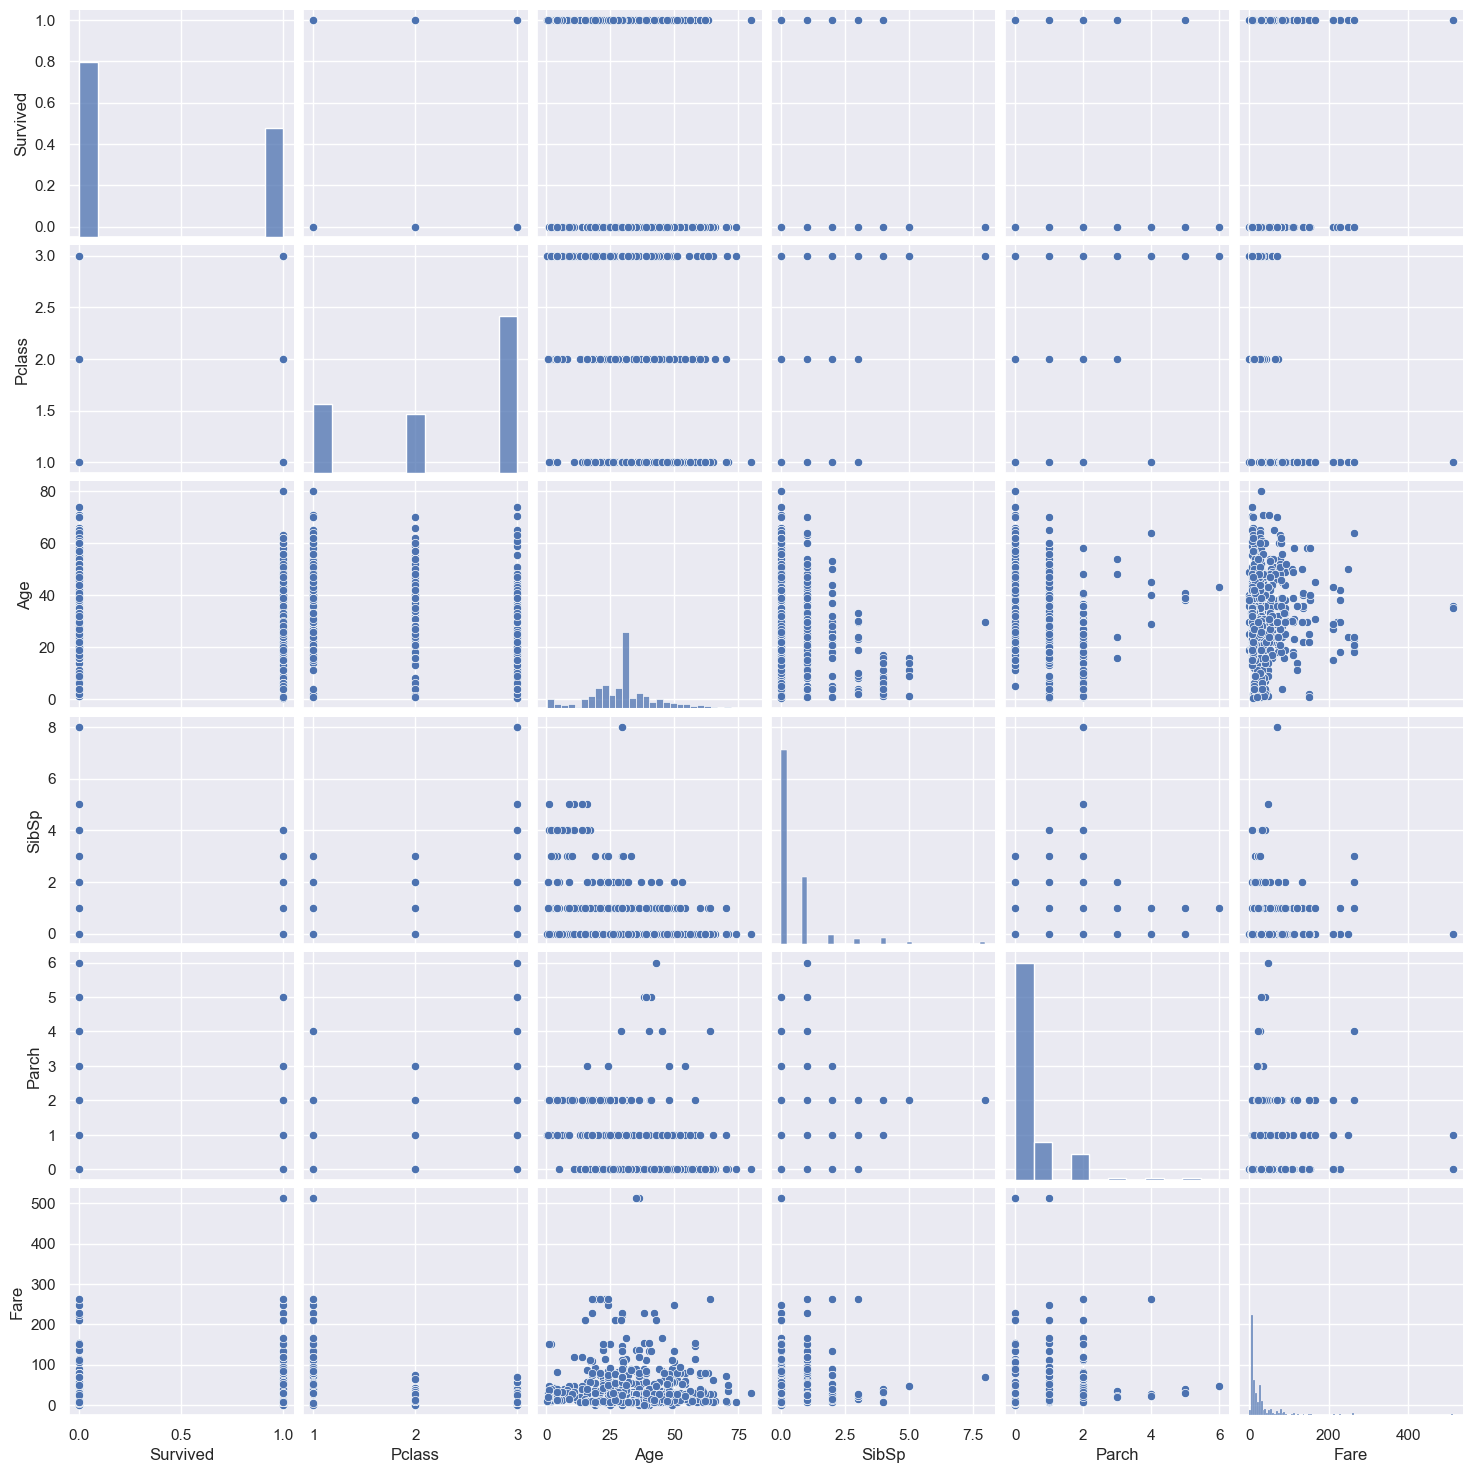

In [109]:
# Plotting pairplot for dataset
sns.pairplot(titanic_data,)
plt.show()

## 4.5. Jointplot

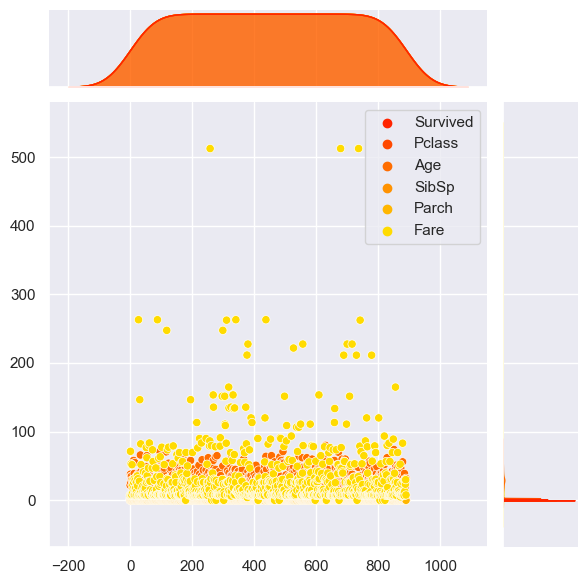

In [111]:
# Plotting jointplot for dataset
sns.jointplot(titanic_data, palette='autumn')
plt.show()

## 4.6. Heatmap (Correlation)

In [163]:
# showing Correlation
titanic_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


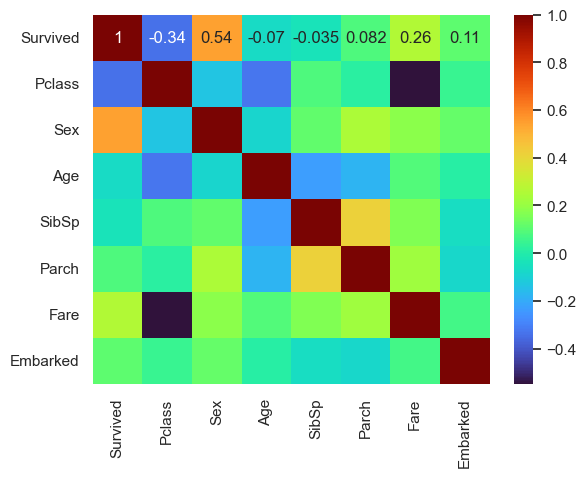

In [165]:
# Plotting correlation plot (heatmap) for dataset
sns.heatmap(titanic_data.corr(),annot=True,cmap='turbo')
plt.show()

**This plot clearly illustrates:**

- **A strong positive correlation between "SibSp" and "Parch."**
  
- **A strong negative correlation between "Pclass" and "Fare."**

# 05. Analyzing Target Variables

In [114]:
# Printing values in "Survived" column
print(titanic_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [116]:
# Converting data for a better understanding for the viewer
titanic_data.replace({'Survived':{0:'Not Survived', 1:'Survived'}}, inplace=True)

Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


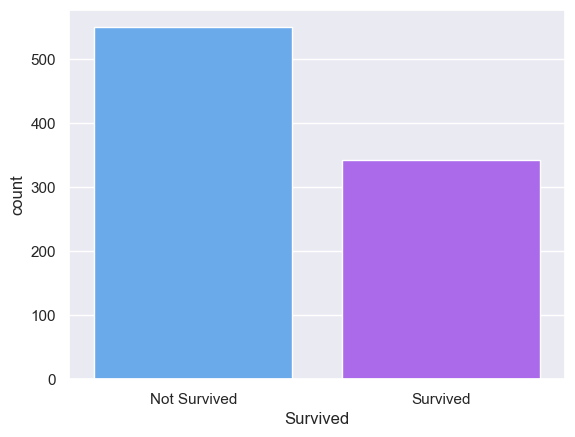

In [118]:
# Plotting CountPlot for Survived Column
print(titanic_data['Survived'].value_counts())
sns.countplot(x=titanic_data['Survived'], palette = "cool")
plt.show()

**The data reveals that the majority did not survive, with 549 individuals perishing and only 342 surviving.**

## 5.1. Visualizing the distribution of various columns based on Survived Column

### 1. Distribution of "Sex" column

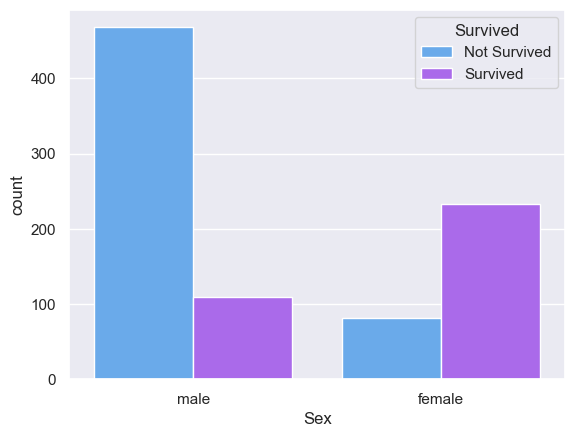

In [123]:
# Distribution of "Sex" column based on Survived Column
sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'], palette='cool')
plt.show()

**The data indicates that most males did not survive, while females had a higher survival rate compared to males.**

### 2. Distribution of "Pclass" column

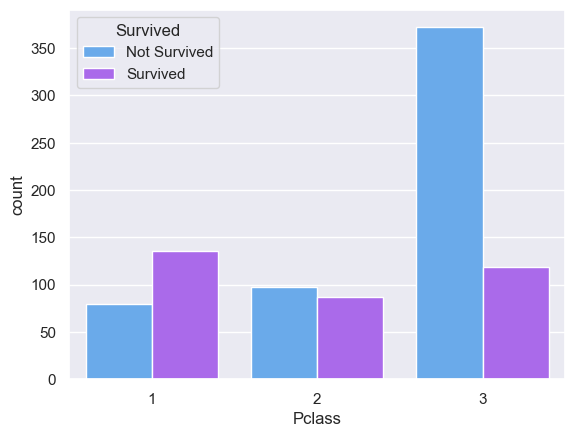

In [127]:
# Distribution of "Pclass" column based on Survived Column
sns.countplot(x=titanic_data['Pclass'], hue=titanic_data['Survived'], palette='cool')
plt.show()

**The data shows that first-class (1) passengers had a higher survival rate compared to other classes. Most non-survivors were from third class (3), while the survival and non-survival numbers in second class (2) were relatively balanced.**

### 3. Distribution of "SibSp" column

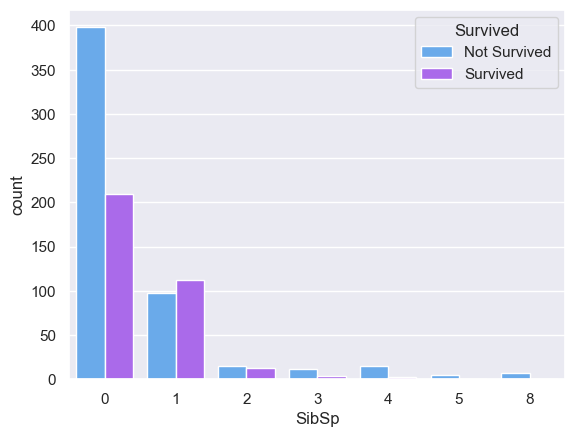

In [131]:
# Distribution of "SibSp" column based on Survived Column
sns.countplot(x=titanic_data['SibSp'], hue=titanic_data['Survived'], palette='cool')
plt.show()

### 4. Distribution of "Parch" column

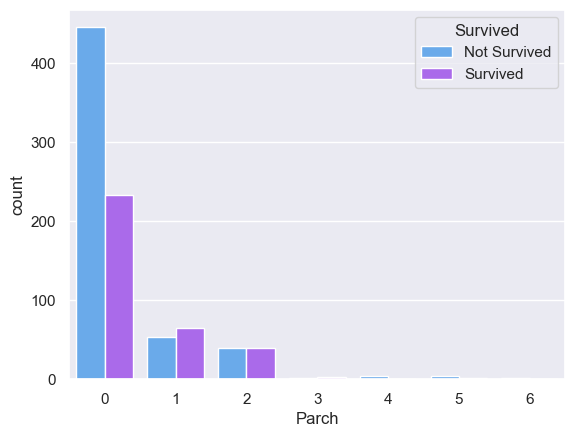

In [134]:
# Distribution of "Parch" column based on Survived Column
sns.countplot(x=titanic_data['Parch'], hue=titanic_data['Survived'], palette='cool')
plt.show()

### 5. Distribution of "Embarked" column

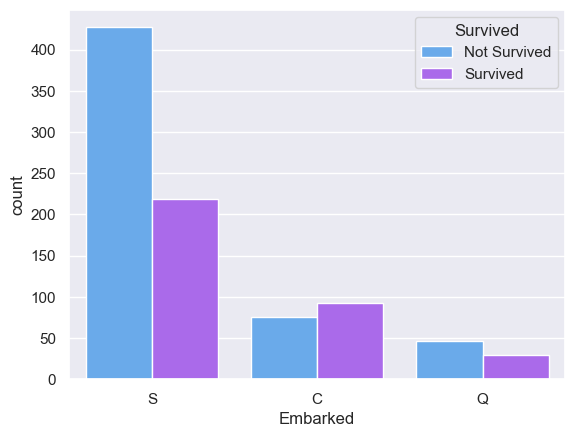

In [137]:
# Distribution of "Embarked" column based on Survived Column
sns.countplot(x=titanic_data['Embarked'], hue=titanic_data['Survived'], palette='cool')
plt.show()

**Most passengers who embarked at Southampton (S) did not survive. In contrast, those who embarked at Cherbourg (C) had a higher survival rate. Passengers from Queenstown (Q) had the fewest survivors.**

### 6. Distribution of "Age" column

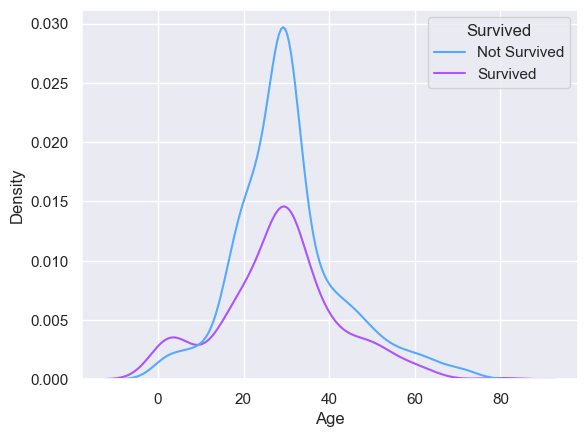

In [141]:
# Distribution of "Age" column based on Survived Column
sns.kdeplot(x=titanic_data['Age'],hue=titanic_data['Survived'], palette='cool')
plt.show()

**This plot shows that the majority of people in the 20-40 age group did not survive.**

## 5.2. Pairplot for Survived Column

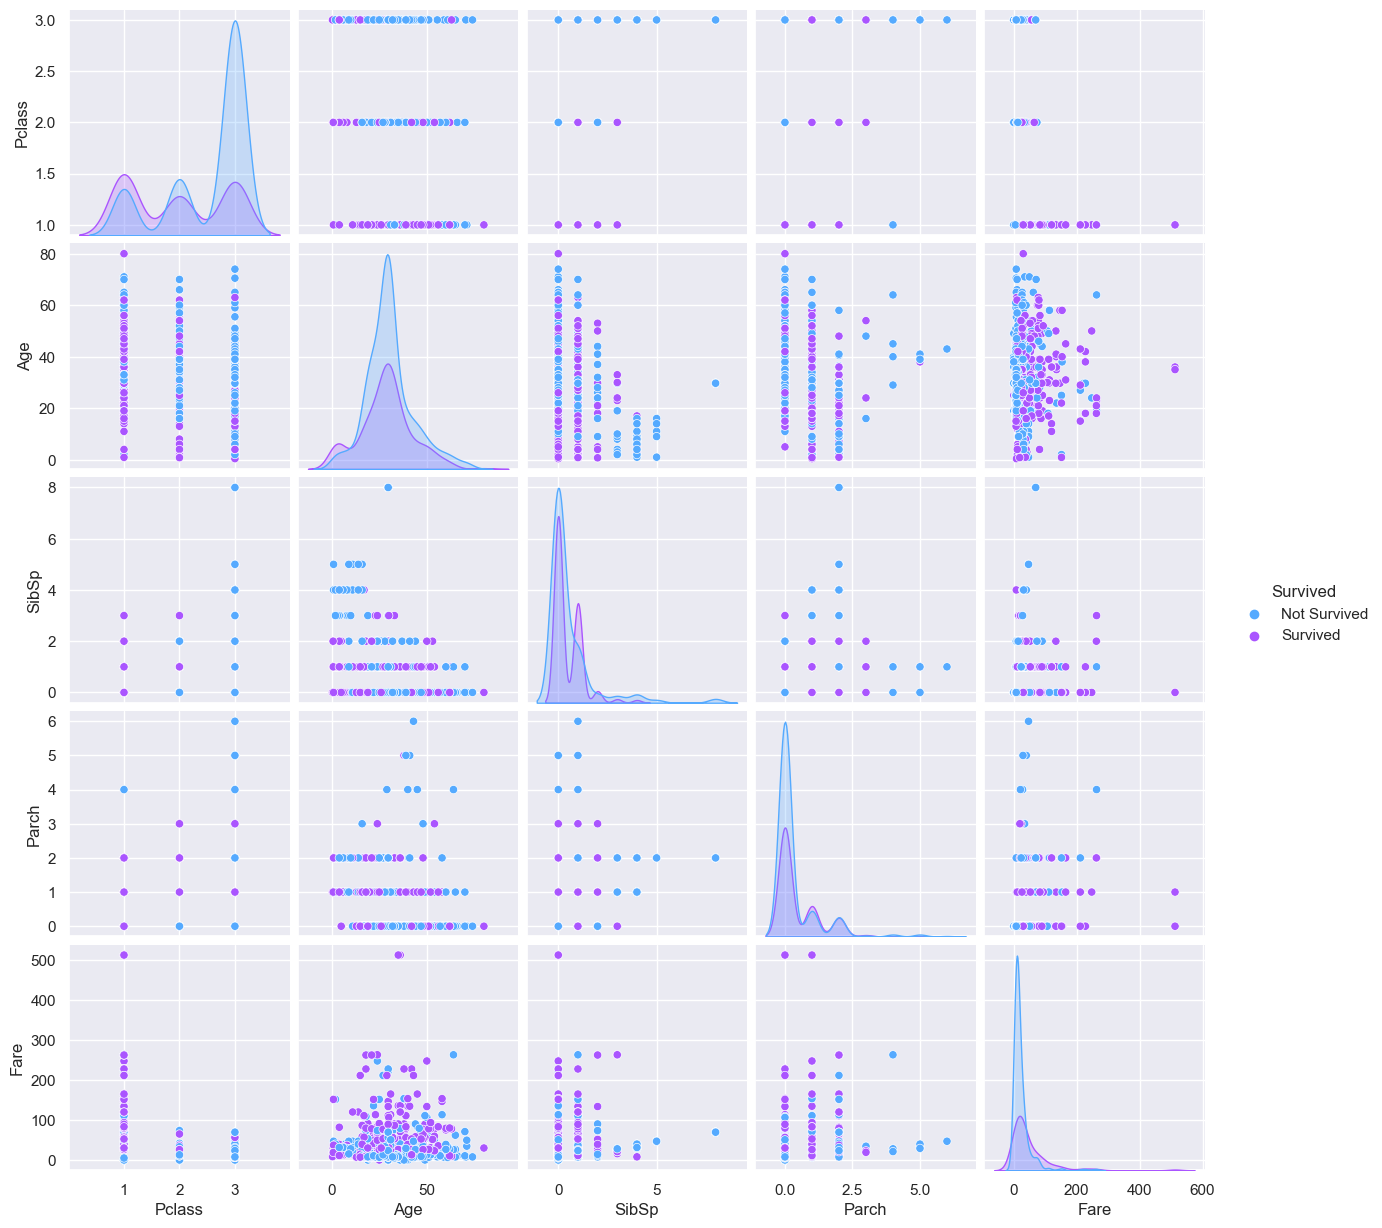

In [145]:
# Plotting Pairplot for "Survived" Column
sns.pairplot(titanic_data, hue='Survived', palette='cool')

# 6. Encoding the Categorical columns.

In [147]:
# Printing values in "Survived" column
print(titanic_data['Survived'].value_counts())

Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


In [148]:
# Printing values in "Sex" column
print(titanic_data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [149]:
# Printing values in "Embarked" column
print(titanic_data['Embarked'].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [150]:
# Converting Categorical columns
titanic_data.replace({'Survived':{'Not Survived':0, 'Survived':1}, 'Sex':{'male':0, 'female':1,}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

### Survived Column
- **Not Survived represent 0**

- **Survived represent 1**
### Sex Column
- **male represent 0**

- **female represent 1**
### Embarked Column
- **S represent 0**

- **C represent 1**

- **Q represent 2**

In [152]:
# Printing first 5 rows of the dataset
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# 7. Data Modelling

## 7.1. Selecting the Independent and Dependent Features

#### 1. Independent Features Selection:

- **The list "ifcol" contains the names of the columns that will be used as the independent features. These features are used to predict the target variable.**
#### 2. Dependent Feature Selection:

- **y = titanic_data['Survived']: This line selects the 'Survived' column from the titanic DataFrame and stores it in y. This y variable is a Series containing the dependent feature or target variable, which indicates whether a passenger survived or not.**
#### 3. Shape and Type Information:
- **The shape and type prints help verify the structure and format of the selected features before proceeding with further analysis or modeling.**

In [156]:
# Defining the columns to be used as independent features
ifcol = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Selecting the independent features from the DataFrame
X = titanic_data[ifcol]

# Selecting the dependent feature (target variable) from the DataFrame
Y = titanic_data['Survived']

# Printing the shape of the independent features DataFrame
print(X.shape)

# Printing the shape of the dependent feature Series
print(Y.shape)

# Printing the type of the independent features (DataFrame)
print(type(X))  

# Printing the type of the dependent feature (Series)
print(type(Y))  


(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [157]:
# Display the first few rows of the independent features
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [158]:
# Display the first few rows of the dependent feature
print(Y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## 7.2. Splitting data into training and testing datasets. 
- **"X.shape" and "Y.shape": Show the original dimensions of the entire dataset.**
- **"X_train.shape" and "Y_train.shape": Indicate that 80% of the data is allocated to the training set.**
- **"X_test.shape" and "Y_test.shape": Indicate that 20% of the data is allocated to the testing set.**

**This process ensures that you have separate datasets for training your model and evaluating its performance, which is crucial for preventing overfitting and assessing the generalizability of your model.**

In [160]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# X_train: The training set for the features.
# X_test: The testing set for the features.
# Y_train: The training set for the target variable.
# Y_test: The testing set for the target variable.

In [161]:
# X.shape: The shape of the entire target variable set before splitting.
# X_train.shape: The shape of the training set for the target variable (80% of the original data).
# X_test.shape: The shape of the testing set for the target variable (20% of the original data).
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [162]:
# Y.shape: The shape of the entire target variable set before splitting.
# Y_train.shape: The shape of the training set for the target variable (80% of the original data).
# Y_test.shape: The shape of the testing set for the target variable (20% of the original data).
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


# 8. Model Evaluation

### Function 1: "evaluate_classification(y_test, y_pred)"
**This function evaluates the performance of a classification model by printing the confusion matrix and classification report.**

**1. Parameters:**
- **ytest: The true labels for the test data.**
- **ypred: The predicted labels from the model for the test data.**

**2. Confusion Matrix:**
- **Computes the confusion matrix using confusion_matrix(ytest, ypred).**
- **The confusion matrix is a summary of prediction results. It shows the number of true positives, true negatives, false positives, and false negatives.**
- **Prints the confusion matrix.**

**3. Classification Report:**
- **Generates a classification report using classification_report(ytest, ypred).**
- **The classification report includes precision, recall, f1-score, and support for each class.**
- **Prints the classification report.**


### Function 2: "model_scores(model)"
**This function prints the training and testing accuracy of the provided model.**

**1. Parameters:**
- **model: The trained model whose performance you want to evaluate.**

**2. Training Score:**
- **Computes the training accuracy using model.score(X_train, Y_train).**
- **X_train and Y_train are the features and labels for the training data.**
- **Prints the training accuracy.**

**3. Testing Score:**
- **Computes the testing accuracy using model.score(X_test, Y_test).**
- **X_test and Y_test are the features and labels for the testing data.**
- **Prints the testing accuracy.**


In [165]:
from sklearn.metrics import confusion_matrix, classification_report

# This function prints the confusion matrix and classification report
# for the provided true and predicted labels.
def evaluate_classification(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', classification_report(Y_test, Y_pred))
    
# This function prints the training and testing accuracy scores for the given model.
def model_scores(model): 
    print('Training Accuracy:', model.score(X_train, Y_train))
    print('Testing Accuracy:', model.score(X_test, Y_test))

## 8.1. Logistic Regression Model

**1. Building the Model Instance**
- **max_iter=1000: This parameter sets the maximum number of iterations taken for the solvers to converge. Increasing this value can help ensure the solver has enough iterations to find the optimal solution.**
- **solver='liblinear': This parameter specifies the algorithm to use in the optimization problem. 'liblinear' is a good choice for small datasets and is the default solver in older versions of scikit-learn. It works well with binary classification.**

**2. Training the Model**
- **This line fits the logistic regression model to the training data. The fit method trains the model using the feature matrix X_train and the target vector Y_train.**
- **X_train: The training input samples (features).**
- **Y_train: The target values (labels).**

In [181]:
# Creating the Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Training the model
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

**3. Computing Training and Testing Scores**
- **This line calls the model_scores function, passing the lr (Logistic Regression model) as an argument. The function prints out the training and testing accuracy of the model.**

**4. Generating Predictions**
- **lr.predict(X_test) generates predictions for the test dataset using the trained Logistic Regression model.**
- **ypred_lr stores these predictions.**
- **print(ypred_lr) prints the predictions to the console.**

In [184]:
# Computing Training and Testing scores
model_scores(lr)

Training Accuracy: 0.8146067415730337
Testing Accuracy: 0.7821229050279329


In [186]:
# Generating Predictions
ypred_lr = lr.predict(X_test)
print(ypred_lr)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


**5. Evaluate the Model Using "evaluate_classification" Function**
- **This line calls the "evaluate_classification" function, passing "Y_test" (the true labels for the test set) and "ypred_lr" (the predicted labels from the Logistic Regression model) as arguments.**
- **Inside the "evaluate_classification" function, it prints the confusion matrix and classification report.**

**6. Compute Accuracy Score:**
- **This line computes the accuracy score by comparing the true labels (Y_test) with the predicted labels (ypred_lr).**
- **"accuracy_score" is a function from the "sklearn.metrics module" that calculates the ratio of correctly predicted instances to the total instances.**

**7. Print the Accuracy Score:**
- **print('Accuracy Score', as_lr): This line prints the computed accuracy score to the console.**

In [189]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_lr)

# Compute and print accuracy score
as_lr = accuracy_score(Y_test, ypred_lr)
print('Accuracy Score', as_lr)


Confusion Matrix:
 [[91  9]
 [30 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

Accuracy Score 0.7821229050279329


## 8.2. Support Vector Classifier (SVC) Model

**1. Import the SVC Class:**
- **This line imports the "SVC" class from the "sklearn.svm" module, which provides the implementation of the Support Vector Classifier.**

**2. Building the SVC Model:**
- **This line creates an instance of the "SVC" class with the parameter "C" set to "1.0".**
-**Parameter "C": This parameter controls the regularization strength. A smaller "C" value creates a smaller margin but more tolerance to classification errors, while a larger "C" value creates a larger margin but less tolerance to errors.**

**3. Training the SVC Model:**
- **This line trains the SVC model using the training data (X_train and Y_train).**
- **Method "fit": This method takes the training features (X_train) and the target labels (Y_train) to build the model.**

In [193]:
#  Import the SVC Class
from sklearn.svm import SVC

# Building Support Vector Classifier Model
svc = SVC(C=1.0)

# Training the model
svc.fit(X_train, Y_train)

SVC()

**4. Computing Training and Testing Scores**
- **This line computes and prints the training and testing accuracy scores for the SVC model using the "model_scores" function defined earlier.**
- **Function "model_scores": This function takes a model as input and prints the training and testing accuracy scores.**

**5. Generating Predictions**
- **The "predict" method of the SVC model is used to generate predictions for the test data (X_test).**
- **The predictions are stored in the "ypred_svc" variable and then printed.**

In [196]:
# Computing Training and Testing score
model_scores(svc)

Training Accuracy: 0.6797752808988764
Testing Accuracy: 0.6368715083798883


In [198]:
# Generating Prediction
ypred_svc = svc.predict(X_test)
print(ypred_svc)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0]


**6. Evaluate the Model Using "evaluate_classification" Function**
- **This line calls a function named "evaluate_classification" with the true labels (Y_test) and the predicted labels (ypred_svc) as arguments.**
- **The "evaluate_classification" function is assumed to be defined elsewhere in the code. It typically evaluates the classification performance of the model and prints metrics such as confusion matrix, classification report, or other evaluation metrics.**

**7. Compute Accuracy Score:**
- **The "accuracy_score" function from the "sklearn.metrics" module calculates the accuracy of the predictions.**
- **Accuracy is defined as the ratio of correctly predicted instances to the total instances.**
- **The calculated accuracy score is stored in the variable "as_svc".**

**8. Print the Accuracy Score:**
- **print('Accuracy Score', as_svc): This line prints the computed accuracy score to the console.**

In [231]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_svc)

# Compute and print accuracy score
as_svc = accuracy_score(Y_test, ypred_svc)
print('Accuracy Score', as_svc)

Confusion Matrix:
 [[95  5]
 [60 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.75       100
           1       0.79      0.24      0.37        79

    accuracy                           0.64       179
   macro avg       0.70      0.60      0.56       179
weighted avg       0.69      0.64      0.58       179

Accuracy Score 0.6368715083798883


## 8.3. Decision Tree Classifier Model

**1. Import the DecisionTreeClassifier Class:**
- **This line imports the "DecisionTreeClassifier" class from the "sklearn.tree" module, which is used to create and train decision tree models.**

**2. Initializing the Decision Tree Classifier:**

**A Decision Tree Classifier object dt is created with the following parameters:**
- **max_depth=5: This parameter limits the maximum depth of the tree to 5 levels. It helps prevent overfitting by controlling the complexity of the tree.**
- **criterion='entropy': This parameter specifies the function to measure the quality of a split. The 'entropy' criterion uses information gain.**
- **min_samples_split=10: This parameter specifies the minimum number of samples required to split an internal node. It helps prevent the model from creating splits that are not statistically significant.**

**3. Training the DecisionTreeClassifier Model:**
- **The "fit" method is called on the "dt" object to train the decision tree classifier. It uses the training data (X_train and Y_train) to build the model.**
- **X_train: The training features.**
- **Y_train: The training labels.**

In [335]:
#  Import the DecisionTreeClassifier Class
from sklearn.tree import DecisionTreeClassifier

# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)

# Training the model
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

**4. Computing Training and Testing Scores**
- **This line calls the model_scores function, passing the trained decision tree model dt as an argument.**
- **The model_scores function prints the training and testing accuracy scores for the model.**

**5. Generating Predictions**
- **This line uses the trained decision tree model dt to make predictions on the test dataset X_test.**
- **dt.predict(X_test): Generates predictions for the input features X_test.**
- **The predictions are stored in the "ypred_dt" variable and then printed.**

In [221]:
# Computing Training and Testing score
model_scores(dt)

Training Accuracy: 0.8469101123595506
Testing Accuracy: 0.7988826815642458


In [225]:
# Generating Predictions
ypred_dt = dt.predict(X_test)
print(ypred_dt)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


**6. Evaluate the Model Using "evaluate_classification" Function**
- **This line calls the "evaluate_classification" function, passing the true labels Y_test and the predicted labels ypred_dt.**
- **The "evaluate_classification" function prints the confusion matrix, classification report, and computes other evaluation metrics for the model.**

**7. Compute Accuracy Score:**
- **The "accuracy_score" function from the "sklearn.metrics" module calculates the accuracy of the predictions.**
- **Accuracy is defined as the ratio of correctly predicted instances to the total instances.**
- **The calculated accuracy score is stored in the variable "as_dt".**

**8. Print the Accuracy Score:**
- **print('Accuracy Score', as_dt): This line prints the computed accuracy score to the console.**

In [234]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_dt)

# Compute and print accuracy score
as_dt = accuracy_score(Y_test, ypred_dt)
print('Accuracy Score', as_dt)

Confusion Matrix:
 [[91  9]
 [27 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.85      0.66      0.74        79

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.79       179

Accuracy Score 0.7988826815642458


## 8.4. k-Nearest Neighbors (kNN) Model

**1. Import the KNeighborsClassifier Class:**
- **Ensure this import statement is included at the beginning of your script to use the "KNeighborsClassifier".**

**2. Building the kNN Classifier Classifier:**

- **KNeighborsClassifier: This is a k-Nearest Neighbors classifier from the "sklearn.neighbors" module.**
- **n_neighbors=8: This parameter specifies the number of nearest neighbors to use when making predictions. In this case, the classifier will consider the 8 nearest neighbors to classify each data point.**

**3. Training the kNN Classifier:**
- **fit: This method trains the kNN classifier on the training data.**
- **X_train: This is the feature matrix for the training set.**
- **Y_train: This is the target variable for the training set, indicating whether each passenger survived or not.****

In [241]:
#  Import the KNeighborsClassifier Class
from sklearn.neighbors import KNeighborsClassifier

# Building the K-Neighbors Classifierr Model
knn = KNeighborsClassifier(n_neighbors=8)

# Training the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

**4. Computing Training and Testing Scores**
- **model_scores: This function (assumed to be defined earlier in your code) computes and prints the training and testing accuracy scores for the given model.**
- **knn: This is the k-Nearest Neighbors classifier model that you trained earlier.**

**5. Generating Predictions**
- **knn.predict(X_test): This method generates predictions for the test set using the trained kNN model.**
- **ypred_knn: This variable stores the predicted values (whether each passenger survived or not) for the test set.**
- **print(ypred_knn): This prints the predicted values for the test set.**

In [246]:
# Computing Training and Testing score
model_scores(knn)

Training Accuracy: 0.7752808988764045
Testing Accuracy: 0.6703910614525139


In [248]:
# Generating Predictions
ypred_knn = knn.predict(X_test)
print(ypred_knn)

[0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


**6. Evaluate the Model Using "evaluate_classification" Function**
- **evaluate_classification: This function (assumed to be defined earlier in your code) evaluates the model by printing the confusion matrix, classification report, and other relevant metrics.**
- **Y_test: These are the true labels for the test set.**
- **ypred_knn: These are the predicted labels generated by the kNN model for the test set.**

**7. Compute Accuracy Score:**
- **accuracy_score(Y_test, ypred_knn): This function computes the accuracy score, which is the ratio of correctly predicted instances to the total instances.**
- **as_knn: This variable stores the computed accuracy score for the kNN model on the test set.**

**8. Print the Accuracy Score:**
- **print('Accuracy Score', as_knn): This line prints the computed accuracy score to the console.**

In [252]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_knn)

# Compute and print accuracy score
as_knn = accuracy_score(Y_test, ypred_knn)
print('Accuracy Score', as_knn)

Confusion Matrix:
 [[85 15]
 [44 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74       100
           1       0.70      0.44      0.54        79

    accuracy                           0.67       179
   macro avg       0.68      0.65      0.64       179
weighted avg       0.68      0.67      0.65       179

Accuracy Score 0.6703910614525139


## 8.5. AdaBoost (Adaptive Boosting) Model

**1. Import the AdaBoostClassifier Class:**
- **Ensure this import statement is included at the beginning of your script to use the "AdaBoostClassifier".**

**2. Building the AdaBoostClassifier:**
- **AdaBoostClassifier: This is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier.**
- **n_estimators=80: This parameter specifies the number of weak classifiers (estimators) to be used. In this case, 80 weak classifiers will be used.**

**3. Training the AdaBoostClassifier:**
- **fit(X_train, Y_train): This method trains the AdaBoost model using the training data (X_train) and the corresponding labels (Y_train).****

In [270]:
#  Import the AdaBoost Classifier Class
from sklearn.ensemble import AdaBoostClassifier

# Building the AdaBoostClassifier Model
ada_boost = AdaBoostClassifier(n_estimators=80)

# Training the model
ada_boost.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=80)

**4. Computing Training and Testing Scores**
- **model_scores: This function (assumed to be defined earlier in your code) computes and prints the training and testing accuracy scores for the given model.**
- **ada_boost: This is the  AdaBoost classifier model that you trained earlier.**

**5. Generating Predictions**
- **ada_boost.predict(X_test): This method generates predictions for the test set using the trained AdaBoost model.**
- **ypred_ada_boost: This variable stores the predicted values (whether each passenger survived or not) for the test set.**
- **print(ypred_ada_boost): This prints the predicted values for the test set.**

In [273]:
# Computing the Training and Testing Score
model_scores(ada_boost)

Training Accuracy: 0.848314606741573
Testing Accuracy: 0.7374301675977654


In [275]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(X_test)
print(ypred_ada_boost)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1]


**6. Evaluate the Model Using "evaluate_classification" Function**
- **evaluate_classification: This function (assumed to be defined earlier in your code) evaluates the model by printing the confusion matrix, classification report, and other relevant metrics.**
- **Y_test: These are the true labels for the test set.**
- **ypred_ada_boost: These are the predicted labels generated by the kNN model for the test set.**

**7. Compute Accuracy Score:**
- **accuracy_score(Y_test, ypred_ada_boost): This function computes the accuracy score, which is the ratio of correctly predicted instances to the total instances.**
- **as_ada_boost: This variable stores the computed accuracy score for the AdaBoostClassifier model on the test set.**

**8. Print the Accuracy Score:**
- **print('Accuracy Score', as_ada_boost): This line prints the computed accuracy score to the console.**

In [322]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
evaluate_classification(Y_test, ypred_ada_boost)

# Compute and print accuracy score
as_ada_boost = accuracy_score(Y_test, ypred_ada_boost)
print('Accuracy Score', as_ada_boost)

Confusion Matrix:
 [[84 16]
 [31 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       100
           1       0.75      0.61      0.67        79

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.73       179

Accuracy Score 0.7374301675977654


## 8.6. Random Forest Classifier Model Model

**1. Import the RandomForestClassifier Class:**
- **Ensure this import statement is included at the beginning of your script to use the "RandomForestClassifier".**

**2. Building the RandomForestClassifier:**
- **RandomForestClassifier: An ensemble learning method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It reduces overfitting and improves accuracy.**
- **n_estimators=80: Specifies the number of trees in the forest. A higher number generally leads to better performance but increases computational cost.**
- **criterion='entropy': The function used to measure the quality of a split. 'Entropy' is one option that focuses on information gain. It helps in selecting the feature that results in the most homogeneous branches.**
- **min_samples_split=5: The minimum number of samples required to split an internal node. A higher number helps in preventing the model from learning too much from noisy data (overfitting).**
- **max_depth=10: The maximum depth of the tree. Limiting the depth of the tree helps control overfitting by limiting the model complexity..**

**3. Training the RandomForestClassifier:**
- **fit(X_train, Y_train): This method trains the Random Forest Classifier model using the training data (X_train) and the corresponding labels (Y_train).**

In [307]:
#  Import the RandomForestClassifier Class
from sklearn.ensemble import RandomForestClassifier

# Building the RandomForestClassifier Model
rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', min_samples_split=5, max_depth=10)

# Training the model
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

**4. Computing Training and Testing Scores**
- **This line calls the "model_scores" function with the Random Forest Classifier model rfc. This function likely prints out the training and testing scores (accuracy) of the model. It helps evaluate how well the model is performing on the training data and how well it generalizes to the test data.**

**5. Generating Predictions**
- **This line generates predictions for the test data using the Random Forest Classifier model rfc. The predict method takes the features of the test data X_test and returns the predicted labels.**
- **print(ypred_rfc): This prints the predicted values for the test set.**

In [317]:
# Computing the Training and Testing Score
model_scores(rfc)

Training Accuracy: 0.9157303370786517
Testing Accuracy: 0.7877094972067039


In [319]:
# Generating the predictions
ypred_rfc = rfc.predict(X_test)
print(ypred_rfc)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


**6. Evaluate the Model Using "evaluate_classification" Function**
- **The "evaluate_classification" function computes and prints the confusion matrix and classification report for evaluating the performance of a classification model.**
- **To use this function, you pass it the true labels (Y_test) and the predicted labels (ypred_rfc) from your Random Forest Classifier model (rfc).**

**7. Compute Accuracy Score:**
- **The accuracy_score function from sklearn.metrics computes the accuracy of the model by comparing the true labels (Y_test) with the predicted labels (ypred_rfc).**

**8. Print the Accuracy Score:**
- **print('Accuracy Score', as_rfc): This line prints the computed accuracy score to the console.**

In [328]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
evaluate_classification(Y_test, ypred_rfc)

# Compute and print accuracy score
as_rfc = accuracy_score(Y_test, ypred_rfc)
print('Accuracy Score', as_rfc)

Confusion Matrix:
 [[89 11]
 [27 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.83      0.66      0.73        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179

Accuracy Score 0.7877094972067039


# 9. Comparing Classification Model Performance

**This approach allows you to quickly compare the performance of different classification models and identify which one yielded the highest accuracy score on your test data.**

**1. DataFrame Creation (pd.DataFrame):**
- **Create a pandas DataFrame named models.**
-**It has two columns: 'Model' for the names of different classification models and 'Score' for their corresponding accuracy scores.**

**2. Model Names and Scores:**
- **Each row in the DataFrame corresponds to a different model.**
- **The 'Model' column lists the names of the models.**
- **The 'Score' column contains the accuracy scores (as_lr, as_svc, etc.) computed for each model.**

**3. Sorting (sort_values):**

- **The "sort_values" method sorts the DataFrame by the 'Score' column.**
- **"ascending=False" ensures that the DataFrame is sorted in descending order based on accuracy scores, so the model with the highest score appears first.**

In [357]:
# Creating a DataFrame to compare model scores
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Classifier','Decision Tree Classifier','k-Nearest Neighbors','AdaBoost','Random Forest Classifier'],
    'Score': [as_lr,as_svc,as_dt,as_knn,as_ada_boost,as_rfc,]})

# Sorting the DataFrame by 'Score' in descending order and Displaying the sorted DataFrame
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.798883
5,Random Forest Classifier,0.787709
0,Logistic Regression,0.782123
4,AdaBoost,0.737430
3,k-Nearest Neighbors,0.670391
1,Support Vector Classifier,0.636872


**This code snippet effectively visualizes the accuracy scores of different classification algorithms using a bar plot, making it easier to compare their performance visually.**

**4. Setting Seaborn Style (sns.set_style):**
- **sns.set_style("whitegrid") sets the plotting style to have a white grid background using Seaborn.**

**5. Creating a Figure (plt.figure):**
- **plt.figure(figsize=(15, 5)) creates a figure object for the plot with a specified size of 15 inches in width and 5 inches in height.**

**6. Labels (plt.ylabel and plt.xlabel):**
- **plt.ylabel("Accuracy %") sets the label for the y-axis as "Accuracy %".**
- **plt.xlabel("Algorithms") sets the label for the x-axis as "Algorithms".**

**7. Bar Plot (sns.barplot):**
- **sns.barplot(x=models['Model'], y=models['Score'], palette='cool') creates a bar plot using Seaborn's barplot function.**
- **x=models['Model'] specifies the models to be plotted on the x-axis.**
- **y=models['Score'] specifies the accuracy scores to be plotted on the y-axis.**
- **palette='cool' specifies the color palette to be used for the bars.**

**8. Displaying the Plot (plt.show()):**
- **plt.show() displays the generated bar plot.**

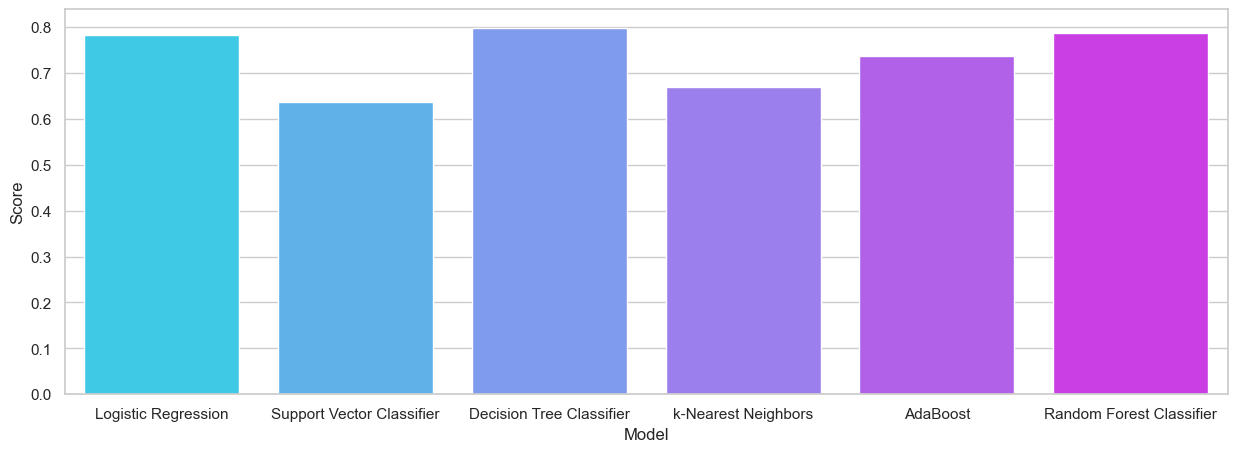

In [359]:
# Setting seaborn style to "whitegrid"
sns.set_style("whitegrid")

# Creating a figure for the plot with specified size
plt.figure(figsize=(15,5))

# Setting labels for y-axis and x-axis
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Creating a bar plot using seaborn's barplot function
sns.barplot(x=models['Model'],y=models['Score'], palette='cool' )

# Displaying the plot
plt.show()

**The DecisionTree Classifier Model achieved the highest accuracy among all evaluated models.**